# Part 1 - Loading Data
---
### Papers Past Topic Modeling
<br/>

Ben Faulks - bmf43@uclive.ac.nz

Xiandong Cai - xca24@uclive.ac.nz

Yujie Cui - ycu23@uclive.ac.nz

In [1]:
import glob, os, sys, subprocess
sys.path.insert(0, '../utils') # for import customed modules
from utils import conf_pyspark, print_filesize, load_dataset
from pprint import pprint
import pandas as pd
pd.set_option('display.max_columns', 500)

# for plot
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## 1 The Papers Past Dataset

In [2]:
# set path of raw data
path = r'../data/papers_past'

**Check total dataset directory size:**

In [3]:
print('Total size:', subprocess.check_output(['du','-sh', path]).split()[0].decode('utf-8'))

Total size: 33G


**Check dataset files path and size:**

In [4]:
files = glob.glob(path + '/*.txt')
files.sort()
print_filesize(files)

1 ../data/papers_past/Akaroa Mail and Banks Peninsula Advertiser.txt 198.2 MB
2 ../data/papers_past/Albertland Gazette.txt 266.6 KB
3 ../data/papers_past/Ashburton Guardian.txt 882.2 MB
4 ../data/papers_past/Auckland Star.txt 1.2 GB
5 ../data/papers_past/Bay Of Plenty Times.txt 403.4 MB
6 ../data/papers_past/Bruce Herald.txt 300.1 MB
7 ../data/papers_past/Bush Advocate.txt 178.4 MB
8 ../data/papers_past/Clutha Leader.txt 245.5 MB
9 ../data/papers_past/Colonist.txt 970.4 MB
10 ../data/papers_past/Daily Southern Cross.txt 796.9 MB
11 ../data/papers_past/Daily Telegraph.txt 456.1 MB
12 ../data/papers_past/Ellesmere Guardian.txt 342.0 MB
13 ../data/papers_past/Evening Post.txt 5.9 GB
14 ../data/papers_past/Fair Play.txt 3.0 MB
15 ../data/papers_past/Feilding Star.txt 823.5 MB
16 ../data/papers_past/Grey River Argus.txt 946.6 MB
17 ../data/papers_past/Hawera & Normanby Star.txt 1.3 GB
18 ../data/papers_past/Hawke's Bay Herald.txt 424.6 MB
19 ../data/papers_past/Hawke's Bay Weekly Times.txt 

**Check total samples/rows/documents of the dataset:**

In [5]:
# list of each file line number
lines = [sum(1 for line in open(f)) for f in files] 

print('Total sample number:', sum(lines))

Total sample number: 16731578


**Visualize the dataset based on the file/publisher:**

In [6]:
# list of each file name
names = [os.path.splitext(os.path.basename(f))[0] for f in files] 
# dictionary of each file path and line number
info = dict(zip(names, lines)) 

# transform dict of dataset files to dataframe for statistic and ploting.
df_info = pd.DataFrame.from_dict(info, orient='index').reset_index()
df_info.columns = ['publisher', 'lines']
df_info = df_info.sort_values('lines', ascending=False).reset_index(drop=True)
df_info.T

0                       1                   2   \
publisher  Evening Post  Hawera & Normanby Star  Wanganui Chronicle   
lines           3007465                  807068              804226   

                          3                    4              5   \
publisher  Otago Daily Times  Marlborough Express  Auckland Star   
lines                 747706               711069         674134   

                           6         7                   8                 9   \
publisher  Poverty Bay Herald  Colonist  Ashburton Guardian  Grey River Argus   
lines                  643505    638055              603346            574017   

                    10             11      12               13  \
publisher  Thames Star  Feilding Star    Star  Wanganui Herald   
lines           562647         467377  431855           420421   

                              14                   15             16  \
publisher  Wairarapa Daily Times  Nelson Evening Mail  Otago Witness   
lines                     375253               343312         329016   

                        17                18                 19  \
publisher  Taranaki Herald  West Coast Times  Northern Advocate   
lines               328784            314293             290601   

                          20                   21               22  \
publisher  North Otago Times  Bay Of Plenty Times  Daily Telegraph   
lines                 283063               246233           217769   

                           23                    24               25  \
publisher  Hawke's Bay Herald  Daily Southern Cross  Southland Times   
lines                  216671                215102           211876   

                      26                  27        28                 29  \
publisher  Timaru Herald  Ellesmere Guardian  NZ Truth  Ohinemuri Gazette   
lines             205144              182751    135108             133499   

                     30             31        32             33  \
publisher  Bruce Herald  Tuapeka Times  Observer  Bush Advocate   
lines            120432         116973    116157         101273   

                       34                                          35  \
publisher  Mataura Ensign  Akaroa Mail and Banks Peninsula Advertiser   
lines               98941                                       96608   

                      36                  37                 38  \
publisher  Clutha Leader  New Zealand Tablet  Manawatu Standard   
lines              88108               79804              79269   

                               39  \
publisher  Wellington Independent   
lines                       76112   

                                                          40               41  \
publisher  Rodney and Otamatea Times, Waitemata and Kaipa...  Inangahua Times   
lines                                                  75831            70689   

                      42               43                   44  \
publisher  Waikato Times  Manawatu Herald  Taranaki Daily News   
lines              61250            59989                59712   

                                                  45              46  \
publisher  Nelson Examiner and New Zealand Chronicle  Manawatu Times   
lines                                          51238           43499   

                                                      47               48  \
publisher  Otautau Standard and Wallace County Chronicle  Lyttelton_Times   
lines                                              40199            28911   

                      49         50                          51  \
publisher  Te Aroha News  Hutt News  Kaipara and Waitemata Echo   
lines              26683      16138                       15809   

                                                         52  \
publisher  New Zealand Spectator and Cook's Strait Guardian   
lines                                                 14283   

                               53                     54    

Text(0.5, 0, 'File/Publisher')

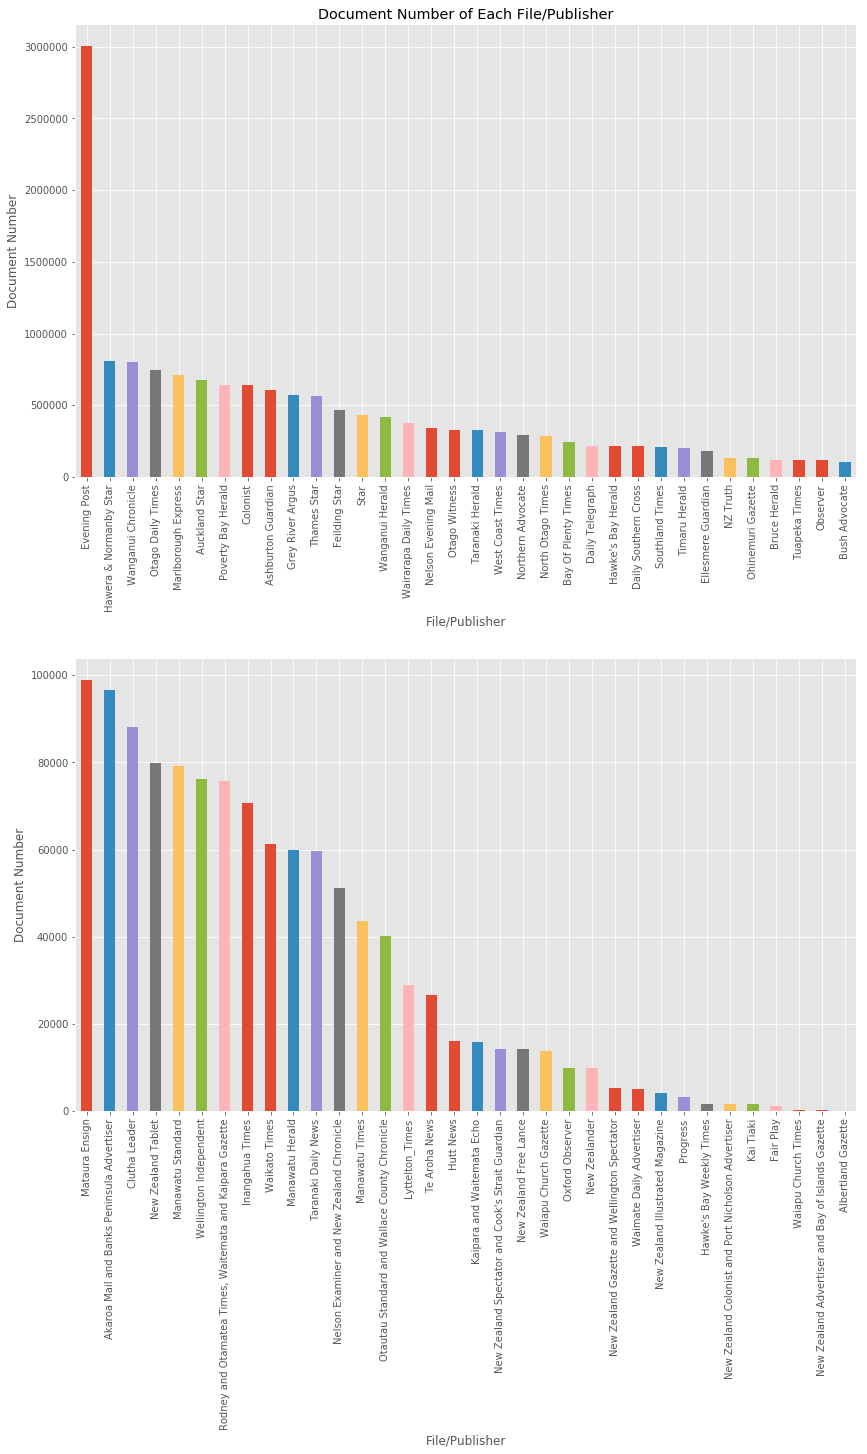

In [7]:
# index of half dataframe, split dataframe to plot better
i = int(df_info.shape[0]/2)

# plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 20))
fig.subplots_adjust(hspace=0.4)
df_info.iloc[:i].plot(ax=axes[0], 
                      kind='bar', 
                      x='publisher', 
                      y='lines', 
                      legend=False)
df_info.iloc[i:].plot(ax=axes[1], 
                      kind='bar', 
                      x='publisher', 
                      y='lines', 
                      legend=False)
axes[0].set_title('Document Number of Each File/Publisher')
axes[0].set_ylabel('Document Number')
axes[0].set_xlabel('File/Publisher')
axes[1].set_ylabel('Document Number')
axes[1].set_xlabel('File/Publisher')

**The Papers Past dataset has:**
* total 33 GB,
* total 68 files, 
* total 16,731,578 lines(samples), 
* each file contains lines from 3,007,465 (Evening Post) to 112 (Albertland Gazette).

## 2 Loading Dataset With PySpark

**For 33 GB dataset, we chose using PySpark as our data process plateform.**

In [8]:
# intiate PySpark
sc, spark = conf_pyspark()

sc

[('spark.app.id', 'local-1548111200539'),
 ('spark.app.name', 'local'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.driver.host', '192.168.1.207'),
 ('spark.driver.memory', '62g'),
 ('spark.master', 'local[*]'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.driver.port', '39254'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.driver.cores', '6'),
 ('spark.driver.maxResultSize', '4g')]


<SparkContext master=local[*] appName=local>

**Load dataset:**

In [9]:
df = load_dataset('papers_past', spark)

**Print random rows of the loaded dataframe, and check row number of the loaded dataframe:**

In [10]:
print('Shape of dataframe: ({}, {})'.format(df.count(), len(df.columns)))
df.sample(False, 0.00001).limit(20).toPandas().head(20)

Shape of dataframe: (16731578, 6)


id                                               url  \
0   13527625  http://api.digitalnz.org/records/13527625/source   
1   14707844  http://api.digitalnz.org/records/14707844/source   
2    3958838   http://api.digitalnz.org/records/3958838/source   
3    4839586   http://api.digitalnz.org/records/4839586/source   
4    6961227   http://api.digitalnz.org/records/6961227/source   
5    5049629   http://api.digitalnz.org/records/5049629/source   
6    5177972   http://api.digitalnz.org/records/5177972/source   
7    5295966   http://api.digitalnz.org/records/5295966/source   
8    6730794   http://api.digitalnz.org/records/6730794/source   
9    7315413   http://api.digitalnz.org/records/7315413/source   
10  11596893  http://api.digitalnz.org/records/11596893/source   
11   4324015   http://api.digitalnz.org/records/4324015/source   
12   6692428   http://api.digitalnz.org/records/6692428/source   
13  14707841  http://api.digitalnz.org/records/14707841/source   
14  15067941  http://api.digitalnz.org/records/15067941/source   
15  15254047  http://api.digitalnz.org/records/15254047/source   
16  15896135  http://api.digitalnz.org/records/15896135/source   
17  16656815  http://api.digitalnz.org/records/16656815/source   
18   3243592   http://api.digitalnz.org/records/3243592/source   
19  11558188  http://api.digitalnz.org/records/11558188/source   

             publisher                      time  \
0   Poverty Bay Herald  1908-07-18T00:00:00.000Z   
1   Poverty Bay Herald  1911-03-28T00:00:00.000Z   
2    Manawatu Standard  1885-04-15T00:00:00.000Z   
3        Tuapeka Times  1880-02-07T00:00:00.000Z   
4        Tuapeka Times  1893-06-03T00:00:00.000Z   
5         Bruce Herald  1891-11-06T00:00:00.000Z   
6             NZ Truth  1919-02-22T00:00:00.000Z   
7             NZ Truth  1919-11-01T00:00:00.000Z   
8             NZ Truth  1926-03-25T00:00:00.000Z   
9             NZ Truth  1928-03-22T00:00:00.000Z   
10     Southland Times  1896-03-21T00:00:00.000Z   
11     Southland Times  1872-10-04T00:00:00.000Z   
12     Southland Times  1880-03-12T00:00:00.000Z   
13         Thames Star  1909-10-02T00:00:00.000Z   
14         Thames Star  1911-10-05T00:00:00.000Z   
15         Thames Star  1911-09-13T00:00:00.000Z   
16         Thames Star  1914-09-10T00:00:00.000Z   
17         Thames Star  1920-05-24T00:00:00.000Z   
18         Thames Star  1898-08-24T00:00:00.000Z   
19     Wanganui Herald  1896-03-24T00:00:00.000Z   

                                                title  \
0   FIJI NATIVE LANDS. (Poverty Bay Herald, 18 Jul...   
1   THE CHURUCH AND CAPITAL. (Poverty Bay Herald, ...   
2   Page 4 Advertisements Column 3 (Manawatu Stand...   
3   Page 3 Advertisements Column 2 (Tuapeka Times,...   
4   ROYALTIES WHO HAVE  RACED. (Tuapeka Times, 03 ...   
5   Page 1 Advertisements Column 6 (Bruce Herald, ...   
6   THE JUGO-SLAV TROUBLE. (NZ Truth, 22 February ...   
7   Page 8 Advertisements Column 3 (NZ Truth, 01 N...   
8         WHEN WINTER COMES (NZ Truth, 25 March 1926)   
9           AN ECONOMY HINT (NZ Truth, 22 March 1928)   
10  Page 3 Advertisements Column 4 (Southland Time...   
11  LATEST TELEGRAMS. (Southland Times, 04 October...   
12  YESTERDAY'S POLICE COURT. (Southland Times, 12...   
13  Sensational Suicide. (Thames Star, 02 October ...   
14    EVENING SITTING. (Thames Star, 05 October 1911)   
15   PUGNACIOUS M.P. (Thames Star, 13 September 1911)   
16  CRISIS IN AUSTRIA (Thames Star, 10 September 1...   
17      Policy for Ireland (Thames Star, 24 May 1920)   
18  Collapse of a Building. (Thames Star, 24 Augus...   
19   ZENANA MISSION. (Wanganui Herald, 24 March 1896)   

                                              content  
0   FIJI NATIVE LANDS.(Press Assn.— By Telegraph. ...  
1   THE CHURUCH AND CAPITAL.Preaching m Holy Trini...  
2   PIEST PRIZE, A.A. AiND A.l. EX HIBITION 1883. ...  
3   TAPANUI RABBIT DISTRICT* j ANNUAL ELECTION OF ...  
4   ROYALTIES WHO HAVE RACED.(TCfi HATEVER ma >' h..

---